In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ipython_memwatcher import MemWatcher
mw = MemWatcher()
mw.start_watching_memory()

In [2] used 0.230 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 42.523 MiB


# Ideal Point Estimation Testing

We want to test our gradient based method of ideal point estimation, against the PyMC3 model.

In [3]:
import ideal_point.ideal_point as ip

In [3] used 79.211 MiB RAM in 1.753s, peaked 0.000 MiB above current, total RAM usage 121.734 MiB


## Generate Test Data

In [ ]:
df = ip.test_data(20)

In [ ]:
df.head()

## Train model

In [18]:
from altair import *
import pandas as pd

In [18] used 9.652 MiB RAM in 0.356s, peaked 0.000 MiB above current, total RAM usage 4340.082 MiB


In [17]:
def plot_params(params):
    rows = []
    for key, value in params.items():
        for (i, v) in enumerate(value):
            rows.append({
                'i': i,
                'param': key,
                'value': v
            })
    df = pd.DataFrame(rows)
    return Chart(df).mark_circle().encode(
        column='param:N',
        x='i:O',
        y='value:Q'
    )

In [17] used 1.191 MiB RAM in 0.016s, peaked 0.000 MiB above current, total RAM usage 4330.430 MiB


### PyMC3 ADVI

In [ ]:
pymc_params = ip.advi_params(ip.create_model(df)).means

In [ ]:
plot_params(pymc_params)

The `vote_ideology` should match with the `legislator_ideology`. The first vote should be close ot the first legislator, and the last vote should be close to the last legislator (in ideology).

### PyMC3 Sampling

In [ ]:
from pymc3 import find_MAP
from pymc3 import NUTS, sample

model=ip.create_model(df)
with model:
    trace = sample(2000)

In [ ]:
from pymc3 import forestplot

In [ ]:
forestplot(trace)

Same problem here...

### Manual Gradient

In [13]:
from ideal_point.gradient import Gradient 
from scipy.special import expit as logistic

In [13] used 0.238 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 5992.418 MiB


In [14]:
%load_ext line_profiler


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
In [14] used 0.000 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 5992.418 MiB


In [20]:
g = Gradient(ip.test_data(30))

In [20] used -135.172 MiB RAM in 0.170s, peaked 135.406 MiB above current, total RAM usage 4213.129 MiB


In [21]:
g.run()

-720.30101696
-720.30101696
-478.285431624
-441.825295499
-420.980500451
-385.627159114
-324.802623769
-252.811290555
-200.873256169
-170.464783023

In [21] used 0.934 MiB RAM in 0.075s, peaked 0.000 MiB above current, total RAM usage 4214.062 MiB


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


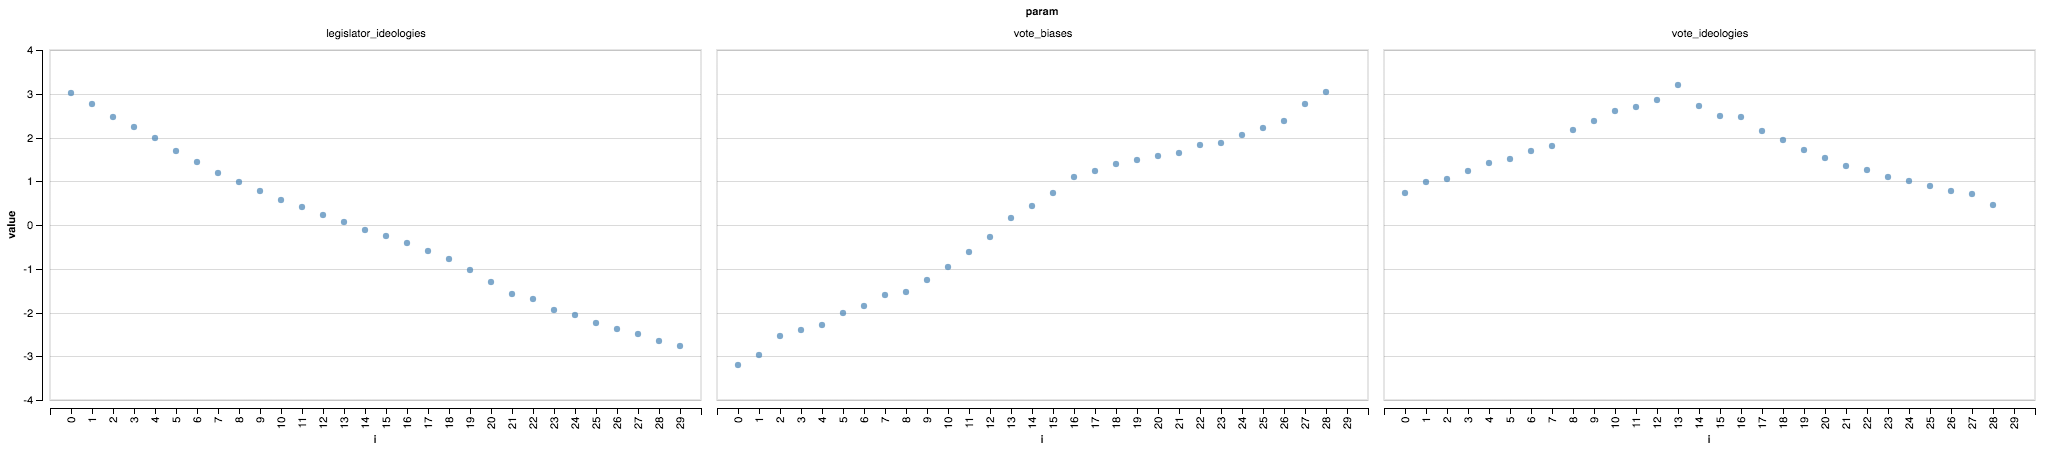

In [22] used 0.000 MiB RAM in 0.019s, peaked 0.000 MiB above current, total RAM usage 4214.062 MiB


In [22]:
plot_params(g.params)

It will keep improving the log likelihood, but it will keep this basic pattern... Which is wrong! Like I said above for PyMC3 ADVI. 